# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plot_label="Volume"
sns.set_theme()

# Load datasets

In [2]:
count_df = pd.read_csv("./data/yonge_count.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
count_df.head()

,location,time,total_count,hour,minute,month,day,day_of_week,dist_from_mid_point,is_north_from_mid_point
0,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 07:45:00+00:00,984,7,45,March,3,Tuesday,3.499076,1
1,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:00:00+00:00,1046,8,0,March,3,Tuesday,3.499076,1
2,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:15:00+00:00,1034,8,15,March,3,Tuesday,3.499076,1
3,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:30:00+00:00,1032,8,30,March,3,Tuesday,3.499076,1
4,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:45:00+00:00,934,8,45,March,3,Tuesday,3.499076,1


In [4]:
print(len(count_df))
print(count_df.time.min())
print(count_df.time.max())

8384
2020-01-16 07:45:00+00:00
2022-10-12 18:00:00+00:00


In [5]:
weather_df.head()

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,...,day,day_of_week,day_of_week_name,hour,minute,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,45,0,1,0,0,0
1,10.0,2022-07-14 12:51:44+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,51,0,1,0,0,0
2,10.0,2022-07-14 12:55:27+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,55,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,...,14,3,Thursday,13,0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,...,14,3,Thursday,13,5,0,1,0,0,0


In [6]:
print(len(weather_df))
print(weather_df.collectedAt.min())
print(weather_df.collectedAt.max())

73535
2022-07-14 12:45:00+00:00
2023-03-26 21:55:00+00:00


# Cast attribute collectedAt to date

In [7]:
count_df["time"] = pd.to_datetime(count_df["time"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

# Drop expanded date and time attributes
- Will merge the data sets by collectedAt first, then will expand again

In [8]:
count_df.drop(['month','day','day_of_week','hour','minute'],inplace=True,axis=1)
count_df.head()

,location,time,total_count,dist_from_mid_point,is_north_from_mid_point
0,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 07:45:00+00:00,984,3.499076,1
1,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:00:00+00:00,1046,3.499076,1
2,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:15:00+00:00,1034,3.499076,1
3,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:30:00+00:00,1032,3.499076,1
4,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:45:00+00:00,934,3.499076,1


In [9]:
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute'],inplace=True,axis=1)
weather_df.head()

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:44+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:27+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,0,1,0,0,0


# Drop windDegree from weather_df

In [10]:
weather_df.drop("windDegree",inplace=True,axis=1)
weather_df.head()

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:44+00:00,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:27+00:00,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,0,0.0,0.0,0,1,0,0,0


# Merge flow and weather dataframes

In [11]:
df = count_df.merge(weather_df,left_on="time",right_on="collectedAt",how="inner")
df.head()

,location,time,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,DELISLE AVE AT YONGE ST,2022-08-11 07:45:00+00:00,204,0.544386,0,10.0,2022-08-11 07:45:00+00:00,20.94,21.05,75,2.57,75,0.0,0.0,1,0,0,0,0
1,BALMORAL AVE AT YONGE ST,2022-08-11 07:45:00+00:00,175,0.920430,0,10.0,2022-08-11 07:45:00+00:00,20.94,21.05,75,2.57,75,0.0,0.0,1,0,0,0,0
2,PLEASANT BLVD AT YONGE ST,2022-08-11 07:45:00+00:00,174,0.775626,0,10.0,2022-08-11 07:45:00+00:00,20.94,21.05,75,2.57,75,0.0,0.0,1,0,0,0,0
3,DELISLE AVE AT YONGE ST,2022-08-11 08:00:00+00:00,213,0.544386,0,10.0,2022-08-11 08:00:00+00:00,20.98,21.04,73,2.57,75,0.0,0.0,1,0,0,0,0
4,BALMORAL AVE AT YONGE ST,2022-08-11 08:00:00+00:00,213,0.920430,0,10.0,2022-08-11 08:00:00+00:00,20.98,21.04,73,2.57,75,0.0,0.0,1,0,0,0,0


In [12]:
len(df)

2144

In [13]:
df.snow1h.value_counts()

0.0    2144
Name: snow1h, dtype: int64

# Plot correlations
- Between speed, visibility, temperature, humidity, wind speed, cloudiness and precipitation

In [14]:
data_to_correlate = df[["total_count","visibility","temperature","humidity","windSpeed","cloudsAll","rain1h","snow1h"]]
corr_mat = data_to_correlate.corr()

In [15]:
corr_mat

,total_count,visibility,temperature,humidity,windSpeed,cloudsAll,rain1h,snow1h
total_count,1.000000,-0.004784,0.175733,-0.127805,0.015981,-0.006180,-0.023390,NaN
visibility,-0.004784,1.000000,-0.076713,-0.065601,-0.087295,-0.110023,0.007179,NaN
temperature,0.175733,-0.076713,1.000000,-0.282636,-0.061946,-0.163355,0.041585,NaN
humidity,-0.127805,-0.065601,-0.282636,1.000000,-0.175055,0.315790,0.084878,NaN
windSpeed,0.015981,-0.087295,-0.061946,-0.175055,1.000000,-0.068017,-0.002179,NaN
cloudsAll,-0.006180,-0.110023,-0.163355,0.315790,-0.068017,1.000000,0.100739,NaN
rain1h,-0.023390,0.007179,0.041585,0.084878,-0.002179,0.100739,1.000000,NaN
snow1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


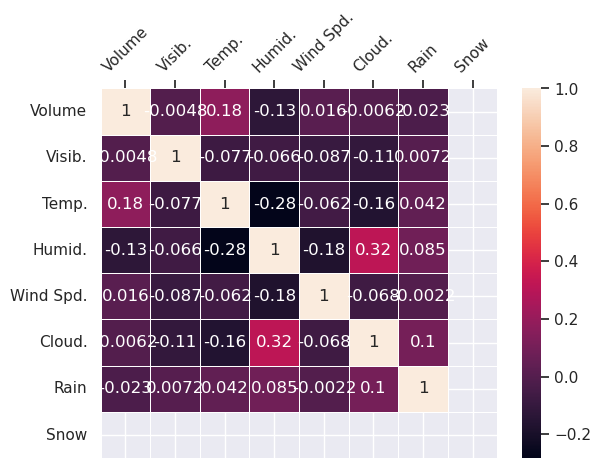

In [16]:
labels=["Volume", "Visib.", "Temp.", "Humid.", "Wind Spd.", "Cloud.", "Rain", "Snow"]

ax = sns.heatmap(corr_mat,annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/071_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/071_correlations.png", bbox_inches="tight")

- Snow is empty because all snow values in the merged dataset are 0.

# Expand date and time
- Also remove collectedAt

In [17]:
df["month"] = df.collectedAt.dt.month
df["day_of_week"] = df.collectedAt.dt.weekday
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df.drop("time",inplace=True,axis=1)
df.head()

,location,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,...,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,DELISLE AVE AT YONGE ST,204,0.544386,0,10.0,20.94,21.05,75,2.57,75,...,1,0,0,0,0,8,11,3,7,45
1,BALMORAL AVE AT YONGE ST,175,0.920430,0,10.0,20.94,21.05,75,2.57,75,...,1,0,0,0,0,8,11,3,7,45
2,PLEASANT BLVD AT YONGE ST,174,0.775626,0,10.0,20.94,21.05,75,2.57,75,...,1,0,0,0,0,8,11,3,7,45
3,DELISLE AVE AT YONGE ST,213,0.544386,0,10.0,20.98,21.04,73,2.57,75,...,1,0,0,0,0,8,11,3,8,0
4,BALMORAL AVE AT YONGE ST,213,0.920430,0,10.0,20.98,21.04,73,2.57,75,...,1,0,0,0,0,8,11,3,8,0


# Onehot encode categorical attributes
- Also cast all fields to float32

- First check how many entries each location has in the merged dataset

In [18]:
df.location.value_counts()

YONGE ST AT FARNHAM AVE & JACKES AVE                  160
ST CLAIR AVE AT YONGE ST (PX 46)                      160
BLOOR ST AT YONGE ST (PX 40)                          160
YONGE ST AT CHAPLIN CRES & DAVISVILLE AVE (PX 47)     160
SCRIVENER SQ AT YONGE ST                               96
CRESCENT RD AT YONGE ST                                96
YONGE ST AT CHURCH ST & DAVENPORT RD (PX 41)           96
YONGE ST AT AYLMER AVE & BELMONT ST (PX 42)            96
CHARLES ST E AT YONGE ST                               96
YONGE ST AT YORKVILLE AVE (PX 2377)                    96
MERTON ST AT YONGE ST                                  96
ROSEHILL AVE AT YONGE ST                               96
YONGE ST AT MACPHERSON AVE & ROWANWOOD AVE (PX 44)     96
BELSIZE DR AT YONGE ST (PX 1410)                       96
HEATH ST W AT YONGE ST (PX 1291)                       96
YONGE ST AT SHAFTESBURY AVE (PX 45)                    96
WOODLAWN AVE AT YONGE ST                               96
ROXBOROUGH ST 

- Onehot encoding location would introduce too many attributes, model may perform poorly. Dropping attribute location.
- Additionally, the location is deternmined by the distance from a determined central point.

In [19]:
df.drop("location",inplace=True,axis=1)

In [20]:
categorical_attrs = ["month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,total_count,dist_from_mid_point,is_north_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,...,day,hour,minute,month_8,month_9,month_10,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_5
0,204.0,0.544386,0.0,10.0,20.940001,21.049999,75.0,2.57,75.0,0.0,...,11.0,7.0,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,175.0,0.920430,0.0,10.0,20.940001,21.049999,75.0,2.57,75.0,0.0,...,11.0,7.0,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,174.0,0.775626,0.0,10.0,20.940001,21.049999,75.0,2.57,75.0,0.0,...,11.0,7.0,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,213.0,0.544386,0.0,10.0,20.980000,21.040001,73.0,2.57,75.0,0.0,...,11.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,213.0,0.920430,0.0,10.0,20.980000,21.040001,73.0,2.57,75.0,0.0,...,11.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Split data set into train, validate and test

In [21]:
X = transformed_df.drop("total_count",axis=1)
y = transformed_df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42)

# Run ML tasks

## Regression

### Linear Regression Cuda

Fitting model...
Fitting model... OK! Took 0.0029897689819335938 seconds

model Linear Regression
r2 0.17242477163395398
mae 70.51018
mse 7870.069
rmse 88.71341
mape 0.2525377
time_to_fit 0.0029897689819335938
time_to_predict 0.00038886070251464844

Dumping model...
Dumping model... OK! Took 0.001491546630859375 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


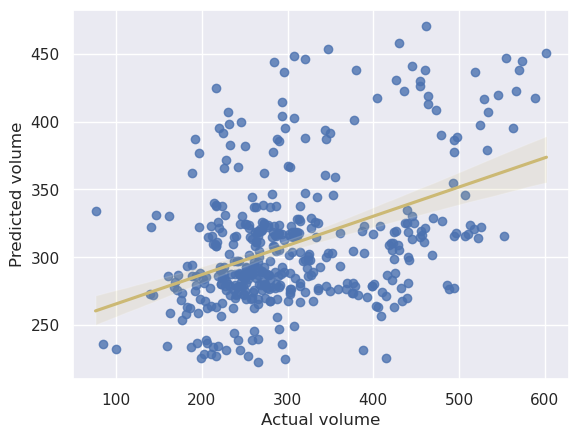

In [22]:
from sklearn.linear_model import LinearRegression

file_name = "071_linear_regression"
model_name = "Linear Regression"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, LinearRegression(), X_train, X_val, y_train, y_val, plot_label)

### Logistic Regression Cuda

Fitting model...


C:\Users\felip\anaconda3\envs\rapids\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting model... OK! Took 1.022294044494629 seconds

model Logistic Regression
r2 -0.2613822198499993
mae 78.11655
mse 11995.482
rmse 109.52389
mape 0.26394328
time_to_fit 1.022294044494629
time_to_predict 0.0030040740966796875

Dumping model...
Dumping model... OK! Took 0.006027698516845703 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


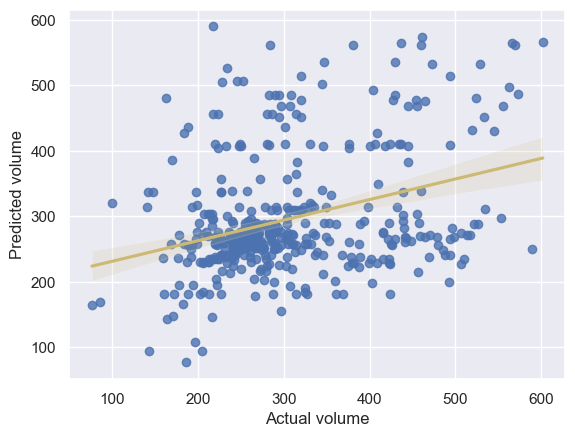

In [25]:
from sklearn.linear_model import LogisticRegression

file_name = "071_logistic_regression"
model_name = "Logistic Regression"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, LogisticRegression(), X_train, X_val, y_train, y_val, plot_label)

### Lasso Cuda

Fitting model...
Fitting model... OK! Took 0.03380894660949707 seconds

model Lasso
r2 0.1711029926047164
mae 70.66465
mse 7882.638
rmse 88.784225
mape 0.25379524
time_to_fit 0.03380894660949707
time_to_predict 0.0009996891021728516

Dumping model...
Dumping model... OK! Took 0.002000093460083008 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


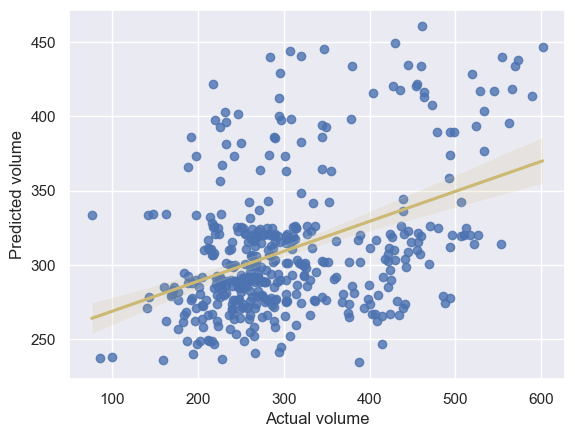

In [26]:
from sklearn.linear_model import Lasso

file_name = "071_lasso"
model_name = "Lasso"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, Lasso(), X_train, X_val, y_train, y_val, plot_label)

### Elastic Net Cuda

Fitting model...
Fitting model... OK! Took 0.002001047134399414 seconds

model Elastic Net
r2 0.16337449187743702
mae 72.15137
mse 7956.135
rmse 89.19717
mape 0.2600826
time_to_fit 0.002001047134399414
time_to_predict 0.0010504722595214844

Dumping model...
Dumping model... OK! Took 0.0284578800201416 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


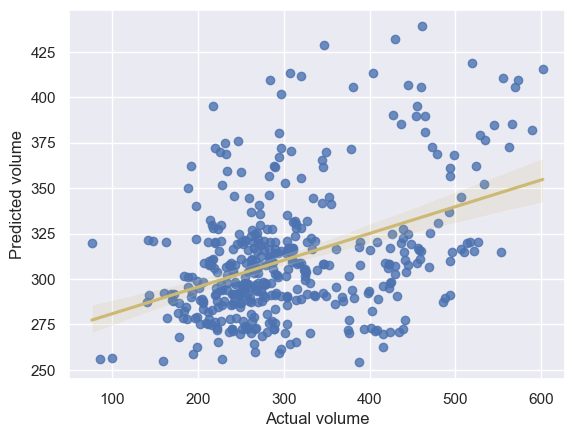

In [27]:
from sklearn.linear_model import ElasticNet

file_name = "071_elastic_net"
model_name = "Elastic Net"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, ElasticNet(), X_train, X_val, y_train, y_val, plot_label)

### Random Forest Cuda

Fitting model...
Fitting model... OK! Took 0.5712130069732666 seconds

model Random Forest
r2 0.9083258788150235
mae 19.71351981351982
mse 871.8018223776224
rmse 29.526290359231083
mape 0.07884922958128446
time_to_fit 0.5712130069732666
time_to_predict 0.012304067611694336

Dumping model...
Dumping model... OK! Took 2.785809278488159 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


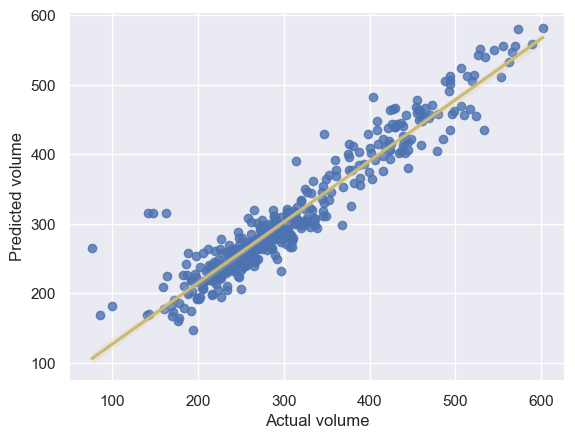

In [28]:
from sklearn.ensemble import RandomForestRegressor

file_name = "071_random_forest"
model_name = "Random Forest"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(), X_train, X_val, y_train, y_val, plot_label)

### Decision Tree

Fitting model...
Fitting model... OK! Took 0.007539510726928711 seconds

model Decision Tree
r2 0.8913121265090534
mae 23.813519813519815
mse 1033.5990675990677
rmse 32.14963557490299
mape 0.08730672541584876
time_to_fit 0.007539510726928711
time_to_predict 0.0008130073547363281

Dumping model...
Dumping model... OK! Took 0.03969311714172363 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


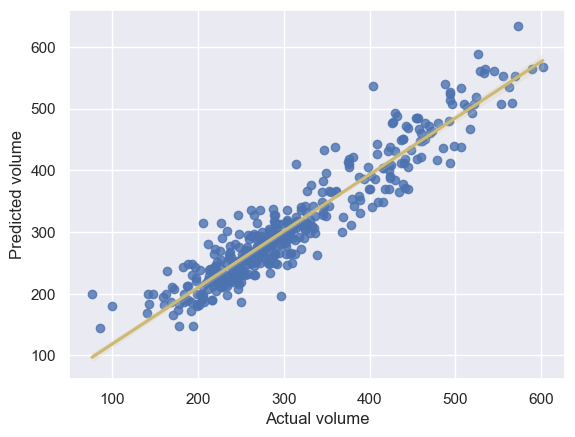

In [29]:
from sklearn.tree import DecisionTreeRegressor

file_name = "071_decision_tree"
model_name = "Decision Tree"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(), X_train, X_val, y_train, y_val, plot_label)

### XGBoost

Fitting model...
Fitting model... OK! Took 0.09498858451843262 seconds

model XGBoost
r2 0.9099104583917762
mae 18.315908
mse 856.7328
rmse 29.269999
mape 0.072156206
time_to_fit 0.09498858451843262
time_to_predict 0.002000093460083008

Dumping model...
Dumping model... OK! Took 0.11579656600952148 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


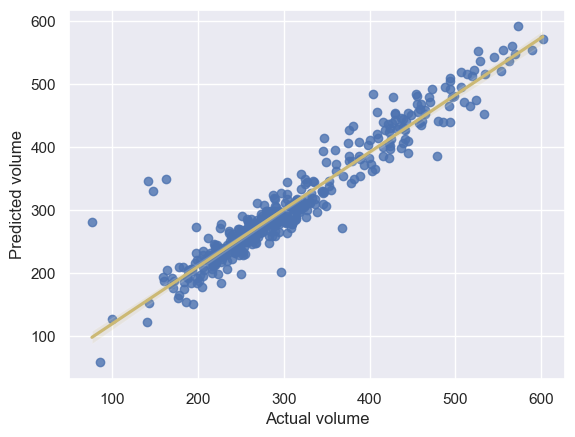

In [32]:
import xgboost as xgb

file_name = "071_xgboost"
model_name = "XGBoost"

xgb_params = {"objective": "reg:squarederror", "tree_method": "hist"}

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**xgb_params), X_train, X_val, y_train, y_val, plot_label)

### MLP

Fitting model...


C:\Users\felip\anaconda3\envs\rapids\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 1.0905065536499023 seconds

model MLP
r2 0.11434336042607407
mae 73.74746
mse 8422.411
rmse 91.7737
mape 0.26243824
time_to_fit 1.0905065536499023
time_to_predict 0.0030024051666259766

Dumping model...
Dumping model... OK! Took 0.008268594741821289 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


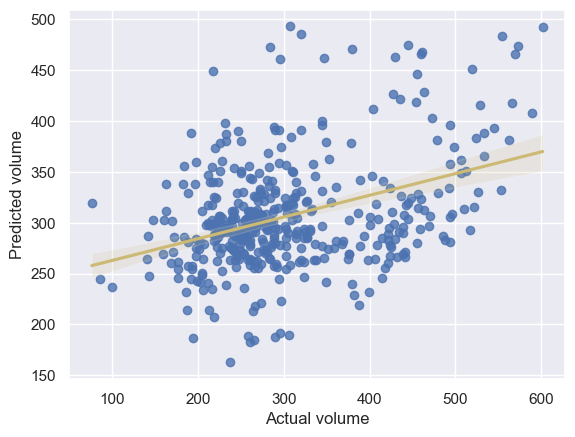

In [33]:
from sklearn.neural_network import MLPRegressor

file_name = "071_mlpr"
model_name = "MLP"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(), X_train, X_val, y_train, y_val, plot_label)